In [301]:
import pandas as pd
import numpy as np
import seaborn as sns

In [302]:
data=pd.read_csv("top-5000-youtube-channels.csv")

# Display All Rows Except the Last 5 rows Using Head Method

In [376]:
data.head(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5,Zee TV,82757,18752951,20869786591
1,2,5,T-Series,12661,61196302,47548839843
2,3,5,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,5,SET India,27323,31180559,22675948293
4,5,5,WWE,36756,32852346,26273668433
...,...,...,...,...,...,...
4989,4990,1,Kukuli,219,660742,437197125
4991,4992,1,Toys to Learn Colors,11,663114,141933264
4992,4993,1,КАZКА,25,131766,74304638
4993,4994,1,United CUBE (CUBE Entertainment…,1055,1586835,371299166


# Display All Rows Except the First 5 Rows Using Tail Method

In [306]:
data.tail(-5)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307
...,...,...,...,...,...,...
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764


# Find Shape of Our Dataset

In [308]:
data.shape

(5000, 6)

In [417]:
print("number of rows is",data.shape[0])
print("number of columns is",data.shape[1])

number of rows is 4610
number of columns is 6


# Get Overall Statistics About The Dataframe

In [310]:
pd.options.display.float_format="{:2f}".format
data.describe()

,Video views
count,5000.000000
mean,1071449400.150000
std,2003843972.123988
min,75.000000
25%,186232945.750000
50%,482054780.000000
75%,1124367826.750000
max,47548839843.000000


# Data Cleaning  (Replace '--'  to NaN)

In [312]:
data=data.replace("--",np.nan,regex=True)

# Check Null Values In The Dataset

In [314]:
data.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [315]:
percentage_of_null=data.isnull().sum()*100/len(data)
percentage_of_null

Rank            0.000000
Grade           0.000000
Channel name    0.000000
Video Uploads   0.120000
Subscribers     7.740000
Video views     0.000000
dtype: float64

# drop null

In [317]:
data.dropna(axis=0,inplace=True)

In [318]:
data.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

# Data Cleaning [ Rank Column ]

In [320]:
data["Rank"]

0           1st
1           2nd
2           3rd
3           4th
4           5th
         ...   
4995    4,996th
4996    4,997th
4997    4,998th
4998    4,999th
4999    5,000th
Name: Rank, Length: 4610, dtype: object

In [321]:
data["Rank"]=data["Rank"].str[0:-2]

In [322]:
data["Rank"] = data["Rank"].str.replace(',', '').astype("int")

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           4610 non-null   int32 
 1   Grade          4610 non-null   object
 2   Channel name   4610 non-null   object
 3   Video Uploads  4610 non-null   object
 4   Subscribers    4610 non-null   object
 5   Video views    4610 non-null   int64 
dtypes: int32(1), int64(1), object(4)
memory usage: 234.1+ KB


# Data Cleaning [ Video Uploads & Subscribers ] 

In [325]:
data.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [326]:
data["Video Uploads"]=data["Video Uploads"].astype("int")

In [327]:
data["Subscribers"]=data["Subscribers"].astype("int")

In [328]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           4610 non-null   int32 
 1   Grade          4610 non-null   object
 2   Channel name   4610 non-null   object
 3   Video Uploads  4610 non-null   int32 
 4   Subscribers    4610 non-null   int32 
 5   Video views    4610 non-null   int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 198.1+ KB


# Data Cleaning [ Grade Column ]

In [378]:
data["Grade"].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [331]:
data['Grade']=data['Grade'].map({'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1})

In [380]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           4610 non-null   int32 
 1   Grade          4610 non-null   int64 
 2   Channel name   4610 non-null   object
 3   Video Uploads  4610 non-null   int32 
 4   Subscribers    4610 non-null   int32 
 5   Video views    4610 non-null   int64 
dtypes: int32(3), int64(2), object(1)
memory usage: 198.1+ KB


# Find Out Top Five Channels With Maximum Number of Video Uploads

In [334]:
data.sort_values(by="Video Uploads",ascending=False).head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
3453,3454,1,AP Archive,422326,746325,548619569
1149,1150,2,YTN NEWS,355996,820108,1640347646
2223,2224,1,SBS Drama,335521,1418619,1565758044
323,324,3,GMA News,269065,2599175,2786949164
2956,2957,1,MLB,267649,1434206,1329206392


# Which Grade Has A Maximum Number of Video Uploads?

<Axes: xlabel='Grade', ylabel='Video Uploads'>

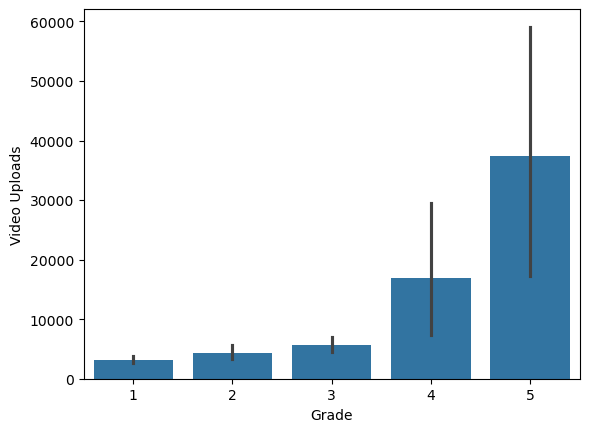

In [336]:
sns.barplot(x="Grade",y="Video Uploads",data=data)

# Which Grade Has The Highest Number of Subscribers?

<Axes: xlabel='Grade', ylabel='Subscribers'>

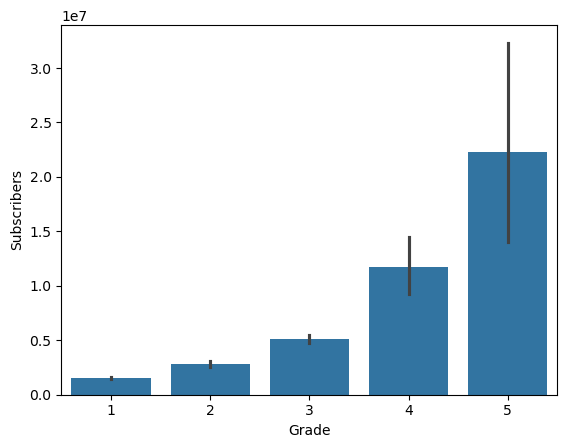

In [384]:
sns.barplot(x="Grade",y="Subscribers",data=data)

# Which Grade Has The Highest Video Views? 

<Axes: xlabel='Grade', ylabel='Video views'>

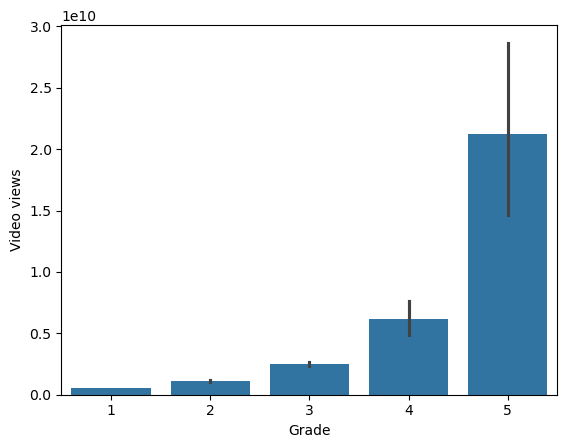

In [402]:
sns.barplot(x='Grade',y='Video views',data=data)

In [422]:
data.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64